# DECISION TREE

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df=pd.read_csv("C:\\Users\\bhupal\\Desktop\\titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
df=df.drop(['PassengerId','Name','Ticket','SibSp','Parch','Cabin','Embarked'],axis=1)

In [128]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


[]

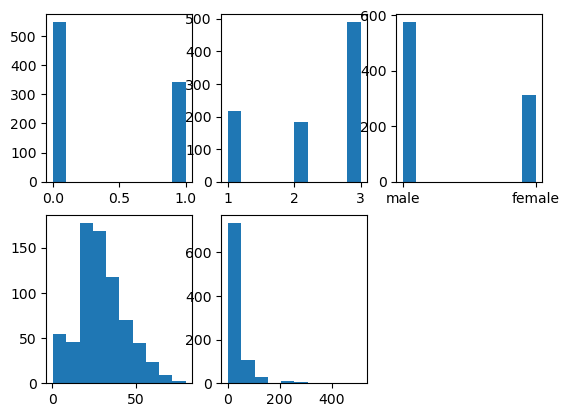

In [129]:
plt.subplot(2,3,1)
plt.hist(df.Survived)
plt.plot()
plt.subplot(2,3,2)
plt.hist(df.Pclass)
plt.plot()
plt.subplot(2,3,3)
plt.hist(df.Sex)
plt.plot()
plt.subplot(2,3,4)
plt.hist(df.Age)
plt.plot()
plt.subplot(2,3,5)
plt.hist(df.Fare)
plt.plot()


<Axes: >

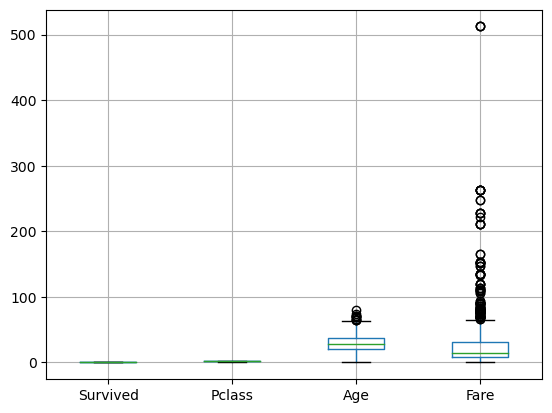

In [130]:
df.boxplot()

In [131]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()

array([1, 0])

In [132]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [133]:
df.Age.median()

28.0

In [134]:
df.Age=df.Age.fillna(28)

In [135]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [136]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [137]:
x=df.drop(["Survived"],axis=1).values
y=df['Survived'].values

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [139]:
len(x_train),len(y_train)

(712, 712)

In [140]:
len(x_test),len(y_test)

(179, 179)

In [141]:
from sklearn import tree

In [142]:
model=tree.DecisionTreeClassifier()

In [143]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [153]:
model.score(x_test,y_test)

0.8268156424581006

In [154]:
model.score(x_train,y_train)

0.9817415730337079

In [155]:
model.predict([[1,0,49.0,25.9292]])

array([1], dtype=int64)

In [149]:
df.sample(3)

,Survived,Pclass,Sex,Age,Fare
702,0,3,0,18.0,14.4542
560,0,3,1,28.0,7.7500
268,1,1,0,58.0,153.4625


In [150]:
from sklearn import tree

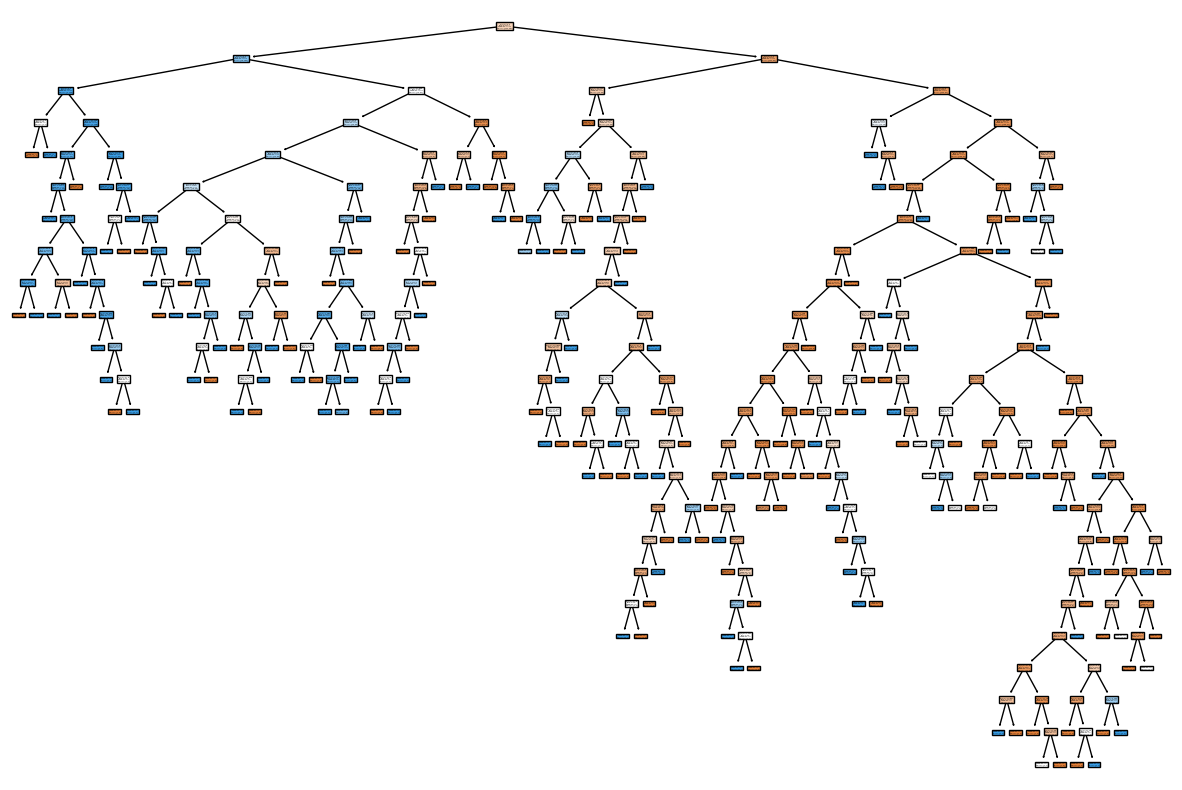

In [151]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

# RANDOM FOREST

In [44]:
iris = sns.load_dataset("iris")

In [45]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: >

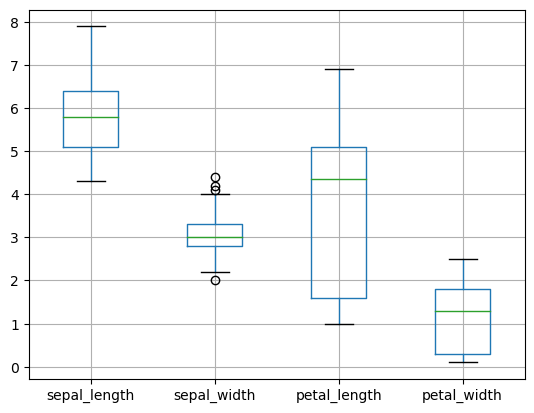

In [46]:
iris.boxplot()

In [47]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

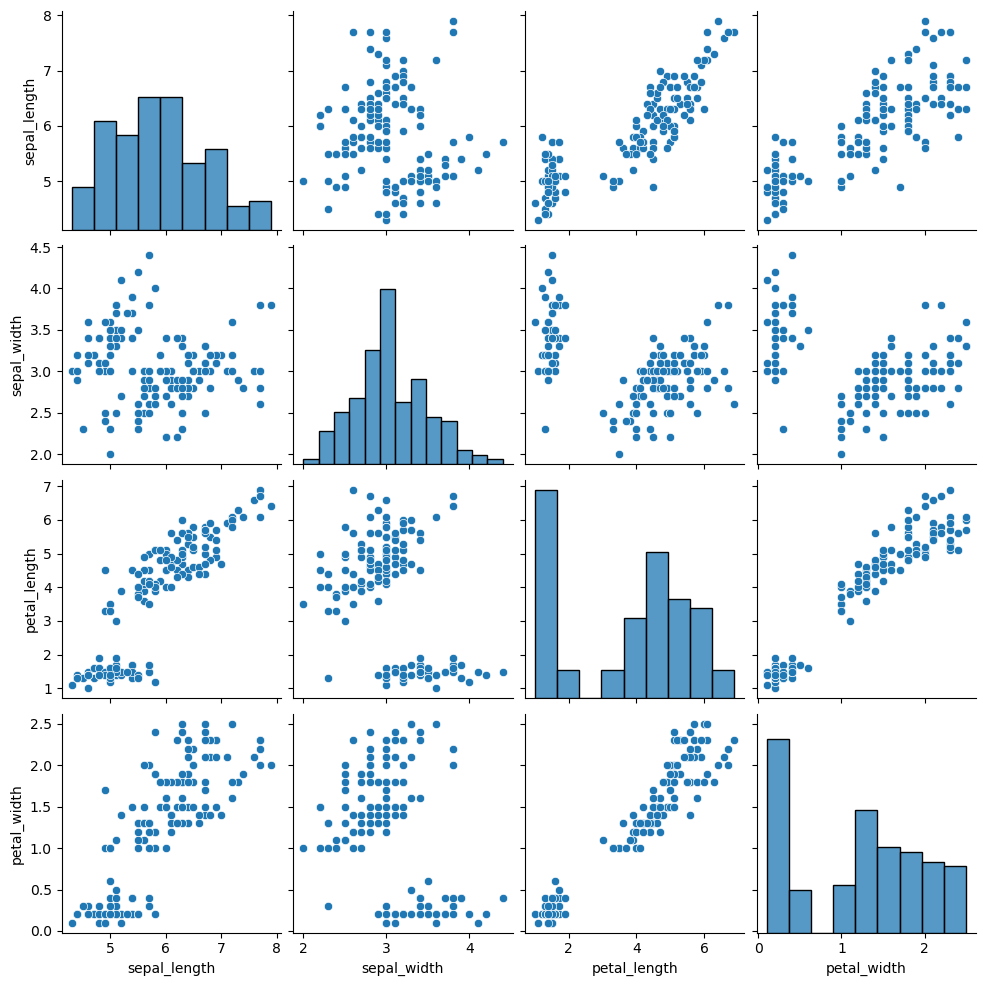

In [120]:
sns.pairplot(iris)

In [49]:
x=iris.drop(["species"],axis=1).values
y=iris['species'].values

In [51]:
len(x),len(y)

(150, 150)

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [98]:
len(x_train),len(y_train)

(120, 120)

In [99]:
len(x_test),len(y_test)

(30, 30)

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
model1=RandomForestClassifier(n_estimators=10)

In [113]:
model1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [118]:
model1.score(x_test,y_test)

1.0

In [119]:
model1.score(x_train,y_train)

1.0

In [116]:
model1.predict([[6.1,3.0,4.6,1.4]])

array(['versicolor'], dtype=object)

In [117]:
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
128,6.4,2.8,5.6,2.1,virginica


In [107]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [111]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [108]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestClassifier(),x,y,cv=cv)

array([0.96666667, 0.93333333, 0.93333333, 0.96666667, 0.96666667])

In [79]:
import pickle

In [95]:
with open ('iris_pickle','wb') as f:
    pickle.dump(model1,f)